# 타이타닉 생존자 예측

의사 결정 트리(DecisionTreeClassifier) 이용

----------

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 데이터 로딩

In [2]:
titanic_df = pd.read_csv('./data/titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


-------

## Feature Enginerring

### 결측값 처리

In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('S', inplace = True)

In [5]:
titanic_df.isnull().sum().sum()

0

### 문자열 처리

In [6]:
# 문자열 값 분류 살펴보기
print('Sex 값 분포: \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포: \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
C22 C26          3
              ... 
A23              1
C45              1
C128             1
D46              1
C7               1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 : 
 S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [7]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

In [8]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S


In [9]:
# 파이썬머신러닝완벽가이드에서 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환한 방법

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,2


### Age 카테고리화

In [10]:
titanic_df.loc[titanic_df['Age'] < 10, 'Age'] = 0
titanic_df.loc[(titanic_df['Age'] >= 10) & (titanic_df['Age'] < 20), 'Age'] = 1
titanic_df.loc[(titanic_df['Age'] >= 20) & (titanic_df['Age'] < 30), 'Age'] = 2
titanic_df.loc[(titanic_df['Age'] >= 30) & (titanic_df['Age'] < 40), 'Age'] = 3
titanic_df.loc[(titanic_df['Age'] >= 40) & (titanic_df['Age'] < 50), 'Age'] = 4
titanic_df.loc[titanic_df['Age'] >=50, 'Age'] = 5

### 데이터 시각화

In [11]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: Survived, dtype: int64

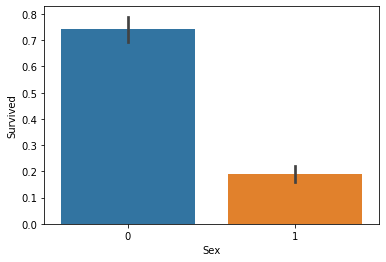

In [12]:
# 성별에 따른 생존율
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

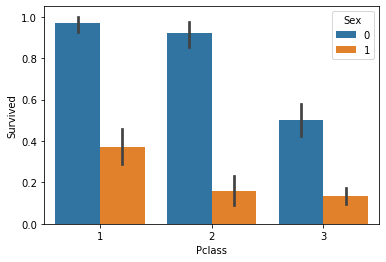

In [13]:
# 부에 따른 생존율
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

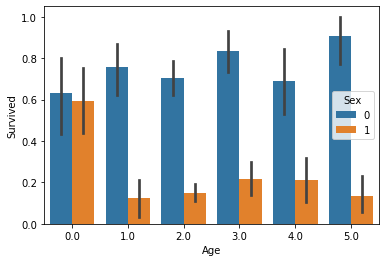

In [14]:
# 나이대에 따른 생존율
sns.barplot(x = 'Age', y = 'Survived', hue = 'Sex', data = titanic_df)

### 특징 추출

In [15]:
titanic_df = titanic_df[['Survived', 'Sex', 'Age', 'Pclass']]
titanic_df.head()

,Survived,Sex,Age,Pclass
0,0,1,2.0,3
1,1,0,3.0,1
2,1,0,2.0,3
3,1,0,3.0,1
4,0,1,3.0,3


------------

## 데이터 셋 구성

In [16]:
X_titanic_df = titanic_df.drop('Survived', axis=1)
y_titanic_df = titanic_df['Survived']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2)

## 학습 및 예측

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train) # 학습

print('training set accuracy:', tree.score(X_train, y_train))

training set accuracy: 0.8132022471910112


In [19]:
# 예측
predict = tree.predict(X_test)

## 모델 검증

In [20]:
from sklearn.metrics import accuracy_score
print('예측 정확도: ', accuracy_score(y_test, predict))

예측 정확도:  0.7988826815642458


-------------

## GridSearchCV를 이용해 DecisionTreeClassifier의
## 최적 하이퍼 파라미터 찾기

In [21]:
# 파이썬머신러닝완벽가이드 참고
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(tree, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도', accuracy)

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8062
테스트 세트에서의 DecisionTreeClassifier 정확도 0.8212290502793296


-----------